In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [69]:
#formatting plots a little nicer
plt.style.use('default')
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['pdf.fonttype'] = 42 # use to make sure exported pdf's have editable text

In [111]:
import matplotlib.animation as manimation

#ax = plt.axes()
plt.rcParams["figure.figsize"] = (7,6) # (w, h)
FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=15, bitrate=4000)
dpi_movie=300

In [113]:
tmax = 7200
dt = 25
t = np.arange(0,tmax+dt,dt)

def Temp(time):
    temp = -time*(time-3600)/3e3
    temp[temp<10]=10
    return temp

Tf = Temp(t)+273.15
#plt.plot(t,Tf)
#plt.xlim(0,tmax)
#plt.ylim(0,max(Tf))

In [115]:
d = np.loadtxt('tree_final_placements_alt4.txt')
#d[-1]

In [117]:
dz = 0.05
z0 = 0
zmax = 15
z_vals = np.arange(z0,zmax+dz,dz)

#k = 2
#rho = 2650
#kappa = 1e-6
#c = k/(rho*kappa)
alpha = 0.3
sigma = 5.67e-8

#d0 = 4 # distance to tree in meters
r = 0.5 #radius of tree in m
h = 5 # total height of tree

#tfire = 87.23969403904118 # seconds
#Tfire = 1500 # in celsius
#TKfire = Tfire + 273.15 # in Kelvins

##E = 60e9
#nu = 0.25
#alpha = 1e-5
#strength = 180e6

nmax=3000

In [119]:
def Q_in(z,time,d): #z is height on wall
    return (1-alpha)*2*r*sigma*Tf[time]**4 / (2*d*np.pi) * ((h*d*(d**2+z*(h-z)))/((d**2+z**2)*(d**2+(z-h)**2)) + np.arctan(z/d) - np.arctan((z-h)/d))

Qmax = np.max([Q_in(z_vals[z],len(t)//4,d[0,z]) for z in range(len(z_vals))])

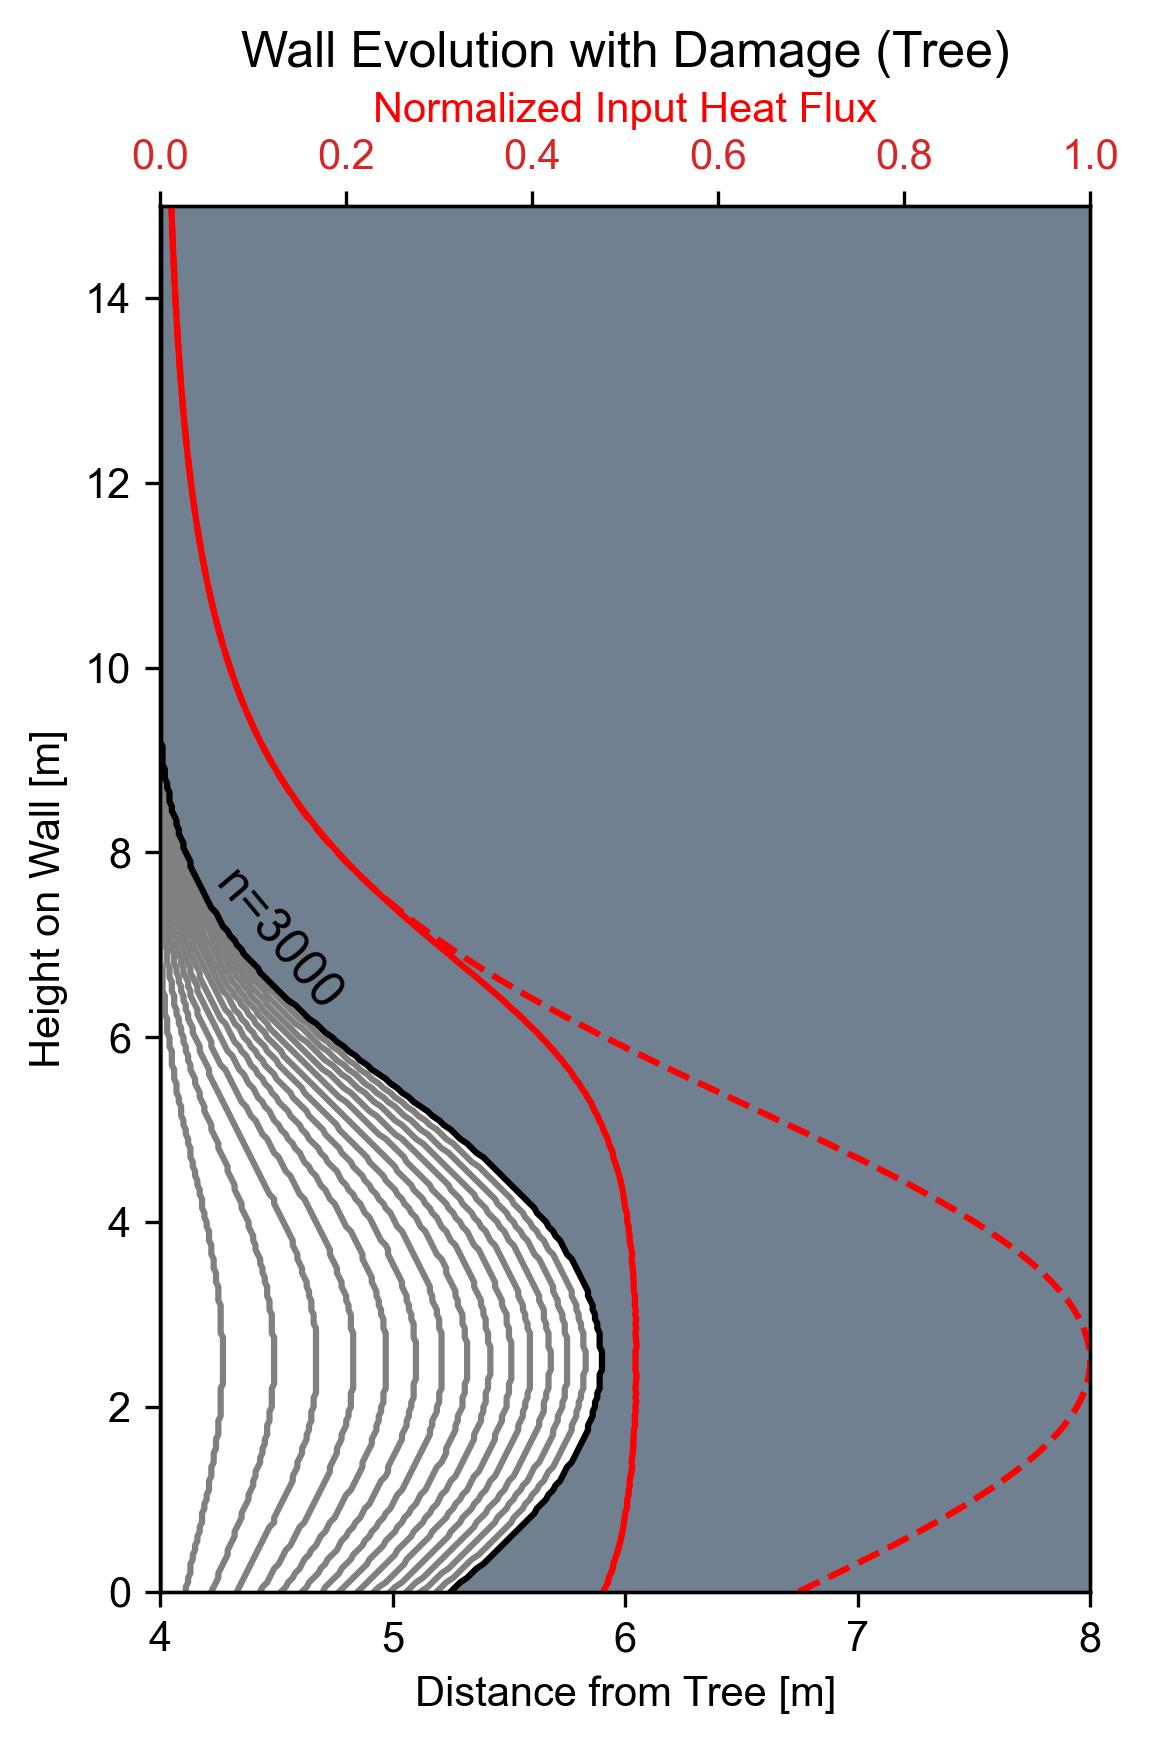

In [129]:
fig, ax1 = plt.subplots(1, 1, figsize=(4,6), dpi=300)
Q = np.array([Q_in(z_vals[z],len(t)//4,d[nmax,z]) for z in range(len(z_vals))])
Q0 = np.array([Q_in(z_vals[z],len(t)//4,d[0,z]) for z in range(len(z_vals))])

ax1.text(4.2,6.3, 'n={}'.format(nmax), fontsize=12, rotation=-50)
ax1.set_title('Wall Evolution with Damage (Tree)')
ax1.set_ylabel('Height on Wall [m]')
ax1.set_xlabel('Distance from Tree [m]')
ax1.set_xlim(4,8)
ax1.set_ylim(0,15)

ax2 = ax1.twiny()
color = 'tab:red'
ax2.plot((Q/Qmax),z_vals, c='red')
ax2.plot(Q0/Qmax,z_vals, c='red', ls='--')
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(0,1)
ax2.set_xlabel('Normalized Input Heat Flux', color='red')

for n in np.arange(0,3000,200):
    ax1.plot(d[n,:], z_vals, c='grey')

ax1.plot(d[-1,:], z_vals, c='k')
ax1.fill_betweenx(z_vals,d[-1,:], 8, color='slategrey')

# if n>500:
#     ax1.plot(d[500,:], z_vals, c='k')
# if n>1000:
#     ax1.plot(d[1000,:], z_vals, c='k')
# if n>1500:
#     ax1.plot(d[1500,:], z_vals, c='k')
# if n>2000:
#     ax1.plot(d[2000,:], z_vals, c='k')
# if n>2500:
#     ax1.plot(d[2500,:], z_vals, c='k')
# if n>3000:
#     ax1.plot(d[3000,:], z_vals, c='k')
# if n>3500:
#     ax1.plot(d[3500,:], z_vals, c='k')
# if n>4000:
#     ax1.plot(d[4000,:], z_vals, c='k')
# if n>4500:
#     ax1.plot(d[4500,:], z_vals, c='k')
#Q = np.array([Q_in(z_vals[z],50,d[n,z]) for z in range(len(z_vals))])
#ax1.plot((Q/np.max(Q))*3 + 4,z_vals, c='r')

plt.savefig('media/figures/fig13A.pdf')